In [4]:
import pandas as pd
import numpy as np 
data=pd.read_csv("F:/talat internship work/covtype.data", header=None)


In [2]:
data.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [7]:
columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
] + [f"Wilderness_Area_{i}" for i in range(4)] + [f"Soil_Type_{i}" for i in range(40)] + ["Cover_Type"]

data.columns= columns

In [8]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [10]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [17]:
X=data.drop("Cover_Type", axis=1)
y=data["Cover_Type"]

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaler=scale.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X_scaler, y , test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred=randomforest.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification report\n")
print(classification_report(y_test, y_pred))

Classification report

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



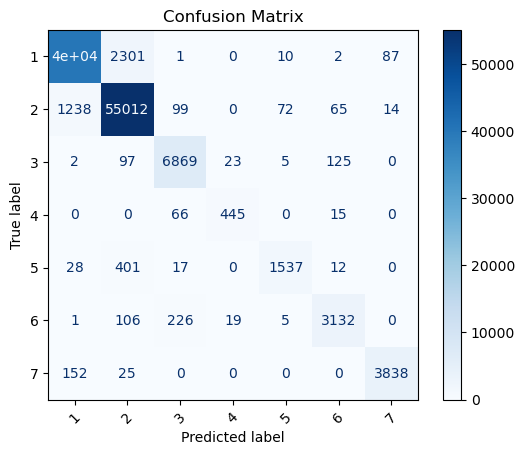

In [29]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=randomforest.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


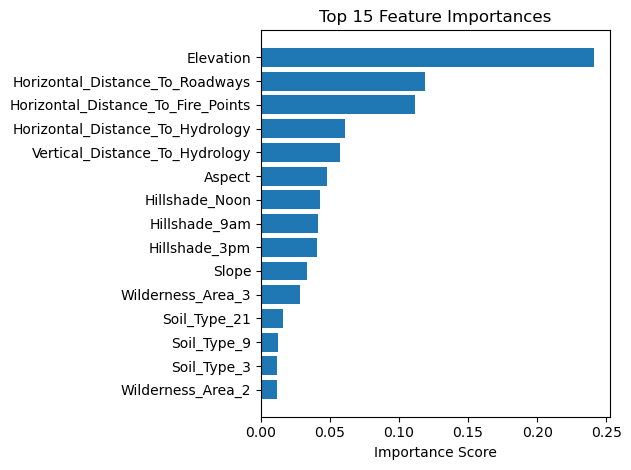

In [30]:
importances = randomforest.feature_importances_
indices = np.argsort(importances)[-15:] 
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

In [41]:

y_xgb = y - 1
from sklearn.model_selection import train_test_split

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_scaler, y_xgb, test_size=0.2, random_state=42, stratify=y_xgb
)

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb.fit(X_train_xgb, y_train_xgb)  # ✅ This must run without errors





y_pred_xgb = xgb.predict(X_test_xgb)
y_pred_xgb_original = y_pred_xgb + 1
y_test_xgb_original = y_test_xgb + 1


from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test_xgb_original, y_pred_xgb_original))
print(classification_report(y_test_xgb_original, y_pred_xgb_original))





Accuracy: 0.8696074972246843
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.88      0.86      0.87       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.01]
}
xgb_model = XGBClassifier(
    objective='multi:softmax',  
    num_class=7,                
    eval_metric='mlogloss',
    random_state=42
)


In [43]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_xgb, y_train_xgb)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=7, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [6, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [45]:
print("Best Parameters Found:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


y_pred_best = best_xgb.predict(X_test_xgb)

# Accuracy
print("Tuned XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_best))
print(classification_report(y_test_xgb, y_pred_best))


Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Tuned XGBoost Accuracy: 0.9304837224512276
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     42368
           1       0.92      0.95      0.94     56661
           2       0.94      0.94      0.94      7151
           3       0.91      0.86      0.88       549
           4       0.92      0.76      0.83      1899
           5       0.91      0.90      0.90      3473
           6       0.97      0.96      0.97      4102

    accuracy                           0.93    116203
   macro avg       0.93      0.90      0.91    116203
weighted avg       0.93      0.93      0.93    116203



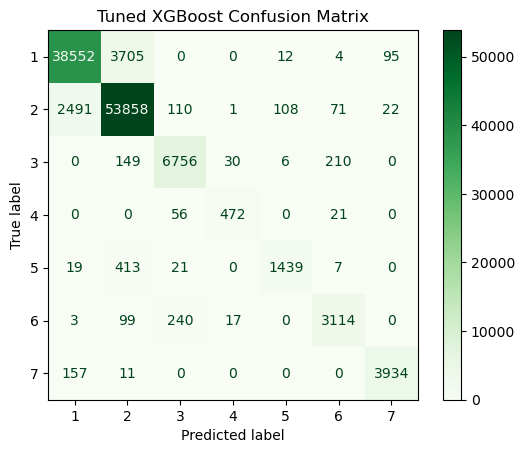

In [46]:
y_pred_best_original = y_pred_best + 1
y_test_original = y_test_xgb + 1

cm = confusion_matrix(y_test_original, y_pred_best_original)
ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3, 4, 5, 6, 7]).plot(cmap='Greens')
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train_xgb, y_train_xgb)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "E:\anaconda\Lib\site-pa

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [48]:
print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

rf_preds = rf_best.predict(X_test_xgb)

from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test_xgb, rf_preds))
print(classification_report(y_test_xgb, rf_preds))


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.953245613280208
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



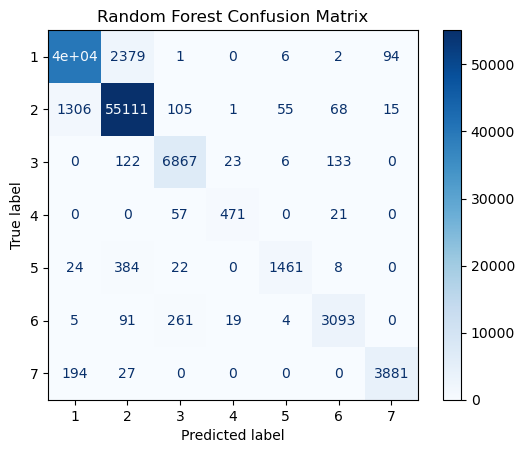

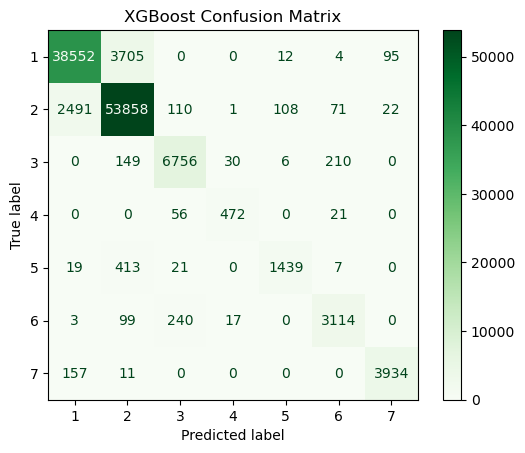

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Convert RF predictions to original class if needed
rf_preds_original = rf_preds + 1
y_test_original = y_test_xgb + 1

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test_original, rf_preds_original)
ConfusionMatrixDisplay(cm_rf, display_labels=[1,2,3,4,5,6,7]).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test_original, y_pred_best_original)
ConfusionMatrixDisplay(cm_xgb, display_labels=[1,2,3,4,5,6,7]).plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()
